In [56]:
# For dealing with categorical data
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [57]:
#I will be working with Pandas Dataframes throughout project
import pandas as pd

In [58]:
#our datavisualization libraries
import seaborn as sns
from seaborn import lmplot

import matplotlib.pyplot as plt
from matplotlib.pyplot import show,figure,subplot



import numpy as np
from scipy import stats

In [59]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [5]:
#Import the correct dataframe 
df = pd.read_csv('kc_house_data.csv', 'r', delimiter=',')

In [6]:
# save duplicated rows into separate dataframe for further analysis
# get rid of duplicated rows
duplicated_id = pd.concat(g for _, g in df.groupby("id") if len(g) > 1)

# The last listed price for each ID is the most recently used information 
# therefore the most accurate representation of housing market
df['id'].drop_duplicates(keep='last',inplace=True)

# The ID has served its purpose and will deprecate regression models so drop this column first
df = df.drop(["id"], axis=1)

In [7]:
# convert the datatypes of discrete variables into 
# int as preperation for on-hot encoding

df.floors = df.floors.astype(int)
 
# when being processed through labelBinarizer().
# TypeError: object of type 'CategoricalDtype' has no len()
df.grade = df.grade.astype('int')

In [8]:
# view is the correct datatype already
# However, there are missing values to be dealt with

df['view'].isnull().sum()
#63 

df['view'].value_counts()
#0.0    19422
#2.0      957
#3.0      508
#1.0      330
#4.0      317
#Name: view, dtype: int64

#replace NaN with 0
df['view'].fillna(0,inplace=True)

In [9]:
#I'm turning yr_renovated into a boolean to show if the house has ever been renovated or not because there are
#So few renovated houses on-hot encoding does not make a lot of sense

df['yr_renovated'].isnull().sum()
#3842
df['yr_renovated'].value_counts().head()
#0.0       17011
#2014.0       73
#2003.0       31
#2013.0       31
#2007.0       30
df['yr_renovated'].fillna(0,inplace=True)

df['yr_renovated'].isnull().sum()
df['yr_renovated'] = df['yr_renovated'].astype(bool)
df['renovated'] = df['yr_renovated']

In [10]:
#waterfront also needs to be turned into a boolean value 1 has waterview, 0 does not
#change datatype to Boolean
df['waterfront'] = df['waterfront'].astype('bool')

In [11]:
#Date needs to be converted into datetime
df['date'] = pd.to_datetime(df['date'])
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

I'm hashing out the next few cells, I put them as dummy variables.  However, they are ordinal and therefore should not be.

In [12]:
#bedrooms_dummies = lb.fit_transform(df.bedrooms)
# you need to convert this back to a dataframe
#bedrooms_dum_df = pd.DataFrame(bedrooms_dummies,columns=lb.classes_)

In [13]:
#floors_dummies = lb.fit_transform(df.floors)
# you need to convert this back to a dataframe
#floors_dum_df = pd.DataFrame(floors_dummies,columns=lb.classes_)

In [14]:
#grade_dummies = lb.fit_transform(df.grade)
# you need to convert this back to a dataframe
#grade_dum_df = pd.DataFrame(grade_dummies,columns=lb.classes_)

In [15]:
#view_dummies = lb.fit_transform(df.view)
# you need to convert this back to a dataframe
#view_dum_df = pd.DataFrame(view_dummies,columns=lb.classes_)

In [16]:
#yr_built_dummies = lb.fit_transform(df.yr_built)
# you need to convert this back to a dataframe
#yr_built_dum_df = pd.DataFrame(yr_built_dummies,columns=lb.classes_)

In [17]:
#zipcode_dummies = lb.fit_transform(df.zipcode)
# you need to convert this back to a dataframe
#zipcode_dum_df = pd.DataFrame(zipcode_dummies,columns=lb.classes_)

sqft_basement is interesting.  I originally used the difference of sqft_above and sqft_living to determine the values of the place holder '?'.  However, there are so few basements in relation to the dataset that I think a simple Boolean would work much better. Simply, does a basement exist? Well, when determining this my first thought was to convert all the '?''s into 1 and change the dtype as a whole making those values==True.  This is not entirely accurate though, I do not know for certain that all the placeholders mean that there is a basement but I do not know the size.  Therefore, I am going to use the difference to change what I can turn the left over placeholders into zero because I cannot say with confidence that they truely have a basement and then convert the column into a boolean. 

In [18]:
df['sqft_basement'].value_counts().head();
#0.0      12826
#?          454
#600.0      217
#500.0      209
#700.0      208
#Name: sqft_basement, dtype: int64

In [19]:
df.loc[df['sqft_basement'] == '?',['sqft_living','sqft_above']];
#454 rows

In [20]:
df.loc[(df["sqft_basement"] == '?') & (df["sqft_above"]!=df['sqft_living'])];
#170 rows that I can with some confidence say they have a basement

In [21]:
#Replace ? with difference between sqft_above and sqft_living
df['sqft_basement'].replace(to_replace='?', value = abs(df['sqft_above']-df['sqft_living']), inplace=True)

In [22]:
df['sqft_basement'].describe();
#count     21597
#unique      397
#top         0.0
#freq      12826
#Name: sqft_basement, dtype: object

In [23]:
#convert the column into a numeric in preperation for becoming boolean
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'])

In [24]:
df['sqft_basement'] = df['sqft_basement'].astype(bool)
df['basement'] = df['sqft_basement']
# The sqft_basement has served its purpose and will be replaces by a more simple basement column
# The sqft_living is also being removed due to it containing the square footage of basement in some 
# instances.  In realestate only the sqft_above should be included when listed.
df = df.drop(["basement", "sqft_living"], axis=1)

Before dropping the categorical columns from the main dataframe I want to explore their geographic location using the lat and long.

Question 1: How are the houses spread out geographically in regards to ordinal variables such as grade, condition, number of floors, view?

In [25]:
#group all of the ordinal features together
ord_features = ["view", "condition",
                  "grade","bedrooms", 
                 "bathrooms", "floors"]

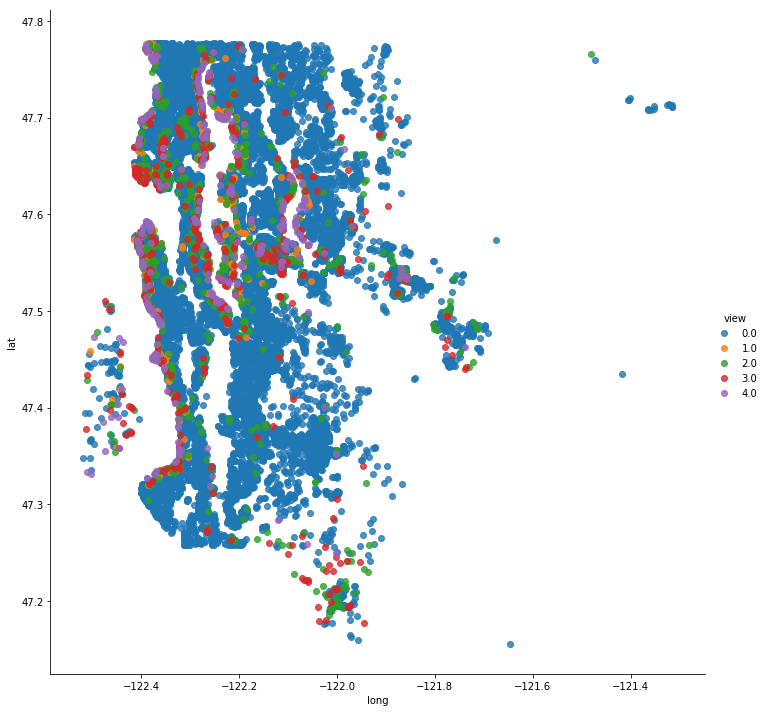

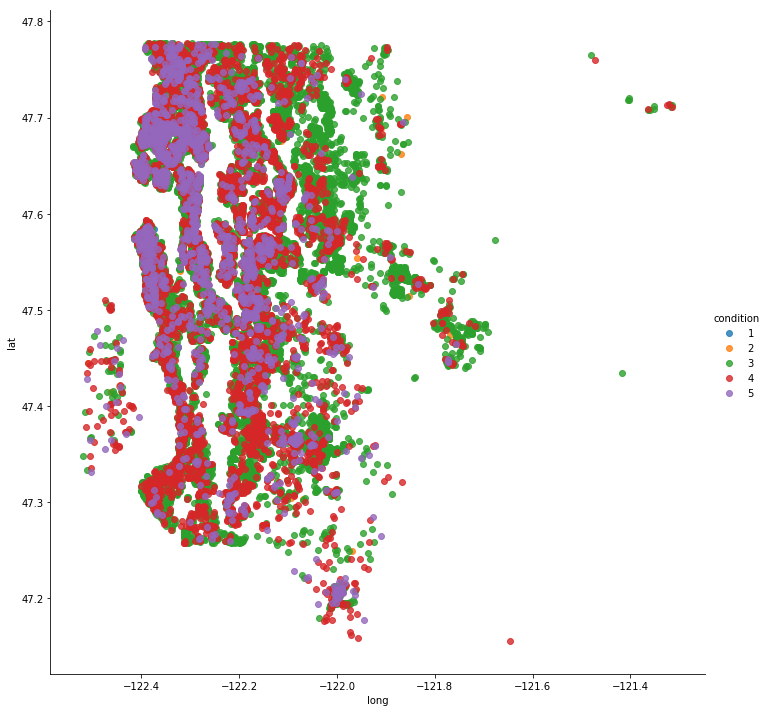

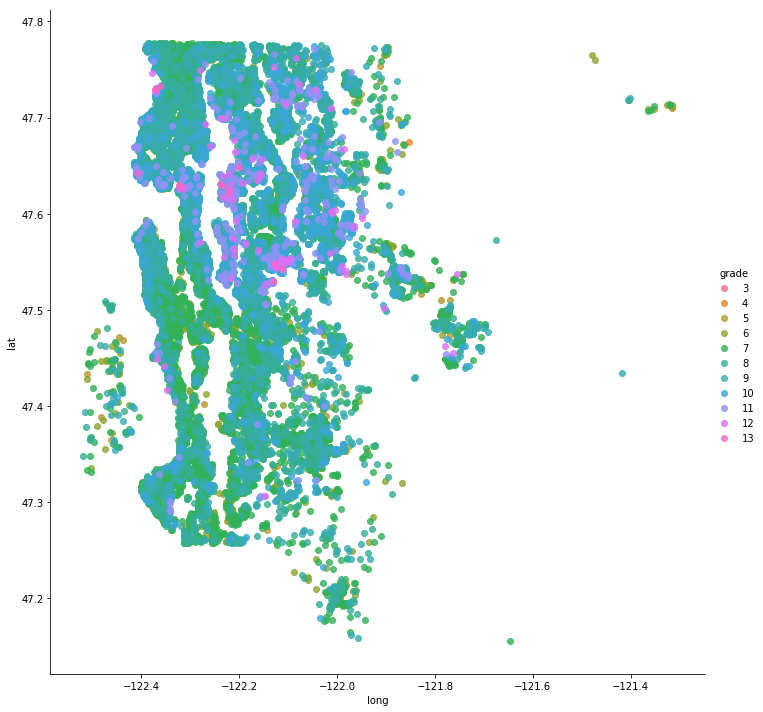

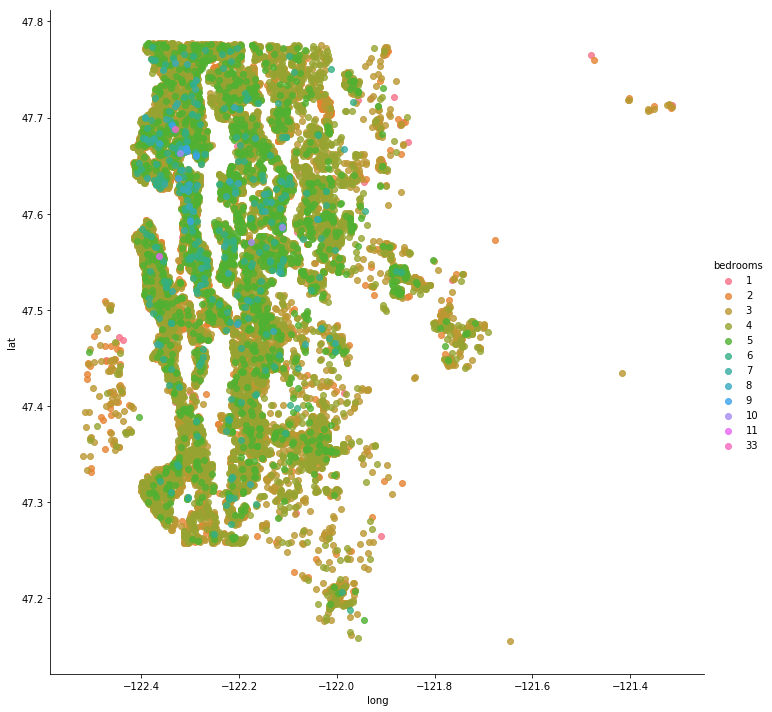

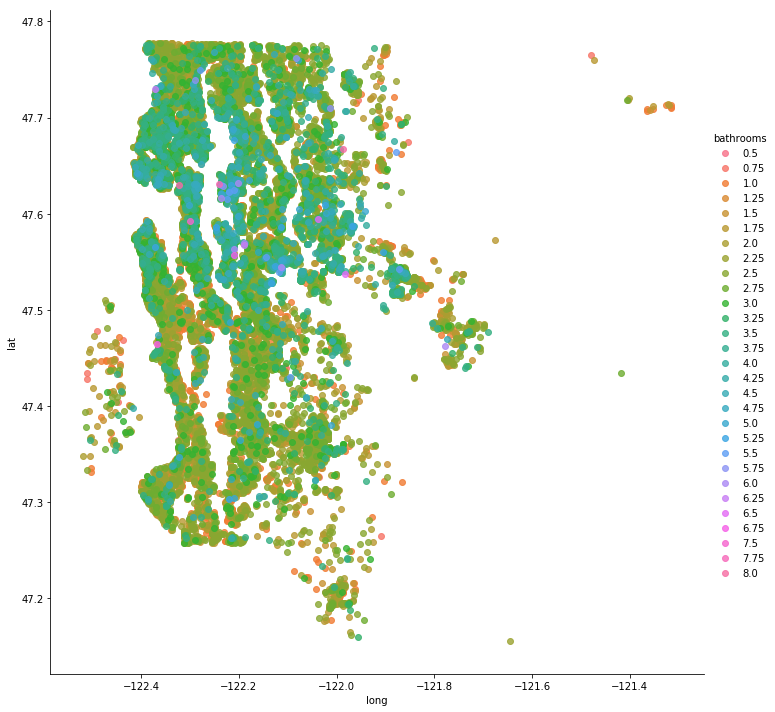

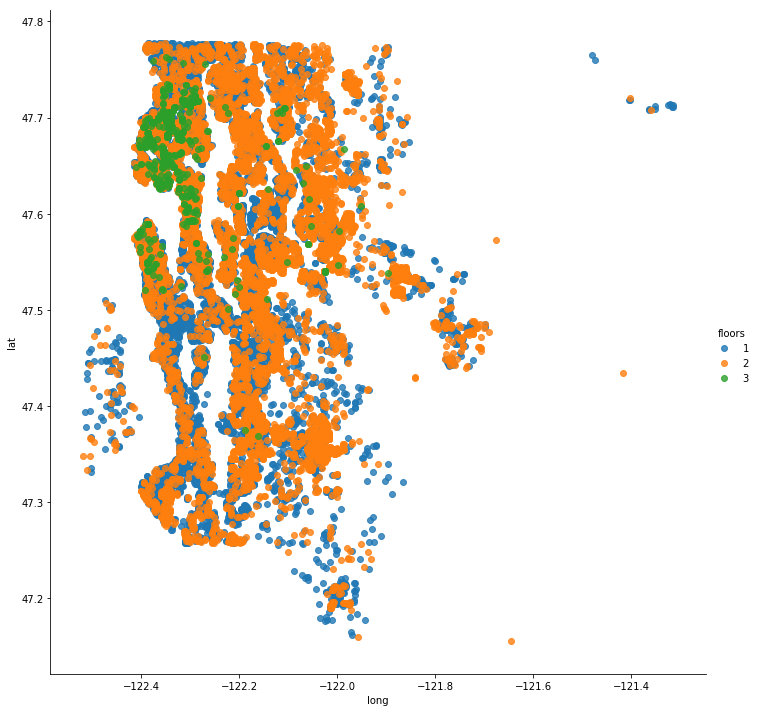

In [26]:
#run the features through lmplot as a forloop to build graph
for x in ord_features:

    lmplot(data=df, x="long", y="lat", fit_reg=False, hue=x, height=10)
    plt.show()

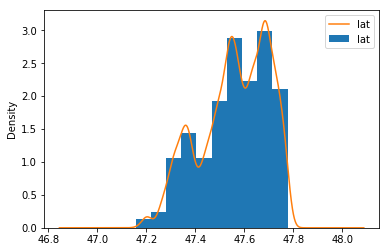

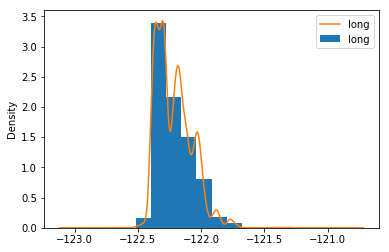

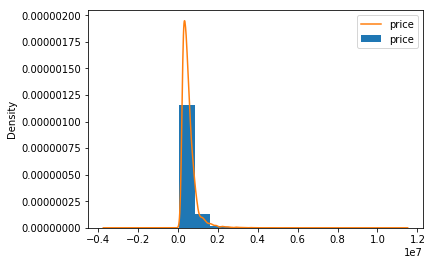

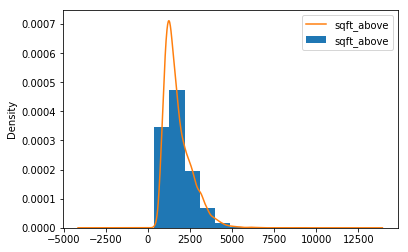

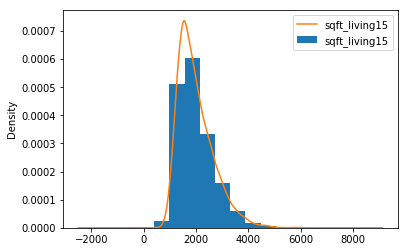

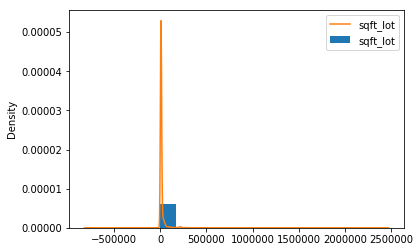

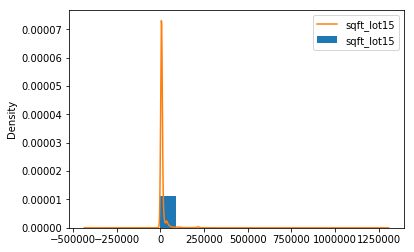

In [27]:
# plot the data for continuous before normalizing and scaling
for column in ['lat', 'long', 'price', 
               "sqft_above", "sqft_living15", 
               "sqft_lot", "sqft_lot15",
              ]:
    df[column].plot.hist(density=True)
    df[column].plot.kde(label=column)
    plt.legend()
    plt.show()

I think I was using methods made for more advanced machine learning algorithms I am going to hash out a lot of stuff below and start again with normalizing and scaling.

In [28]:
#preprocessing did not want to combine int64 with a float datatype
#df['sqft_above'] = df['sqft_above'].astype(float)

In [29]:
#from sklearn import preprocessing

#std_scale = preprocessing.StandardScaler().fit(df[['price', 'sqft_above']])
#df_std = std_scale.transform(df[['price', 'sqft_above']])

#minmax_scale = preprocessing.MinMaxScaler().fit(df[['price', 'sqft_above']])
#df_minmax = minmax_scale.transform(df[['price', 'sqft_above']])

In [30]:
#print('Mean after standardization:\nPrice={:.2f}, Square Foot Above={:.2f}'
#      .format(df_std[:,0].mean(), df_std[:,1].mean()))
#print('\nStandard deviation after standardization:\nPrice={:.2f}, Square Foot Above={:.2f}'
#      .format(df_std[:,0].std(), df_std[:,1].std()))

In [31]:
#%matplotlib inline

In [33]:
#def plot():
#    plt.figure(figsize=(8,6))
#
#    plt.scatter(df['price'], df['sqft_above'],
#            color='green', label='input scale', alpha=.5)
#
#    plt.scatter(df_std[:,0], df_std[:,1], color='red',
#            label='Standardized ', alpha=1)
#
#    plt.scatter(df_minmax[:,0], df_minmax[:,1],
#            color='blue', label='min-max scaled [min=0, max=1]', alpha=1)
#
#    plt.title('Price per square foot above ground')
#    plt.xlabel('Price')
#    plt.ylabel('Squared Footage of House')
#    plt.legend(loc='upper left')
#    plt.grid()
#
#    plt.tight_layout()
#
#plot()
#plt.show()

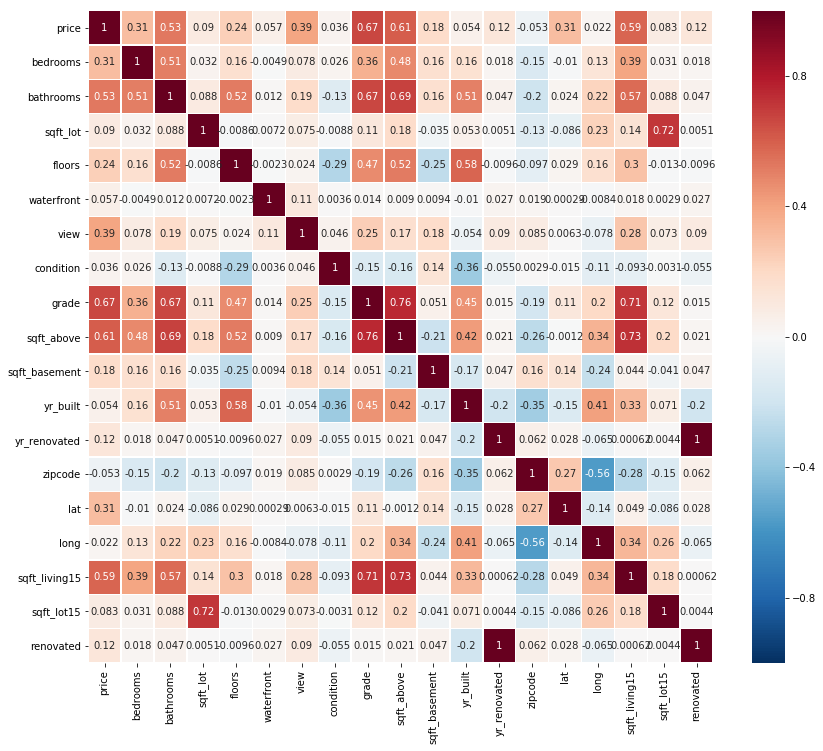

In [34]:
# check for multicollinearity of features
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True,vmin=-1, linewidths=0.5, cmap="RdBu_r")

In [ ]:
# drop discrete ordinal columns
#df = df.drop(["bedrooms", "bathrooms",
#             "floors", "view", "condition",
#             "grade", "zipcode",], axis=1)


In [ ]:
#df.head()

In [ ]:
#from sklearn.svm import LinearSVC
#from sklearn.feature_selection import RFE

#svm = LinearSVC()
# create the RFE model for the svm classifier 
# and select attributes
#rfe = RFE(svm, 3)
#rfe = rfe.fit(df.drop['price','date'], df.price)
# print summaries for the selection of attributes
#print(rfe.support_)
#print(rfe.ranking_)

### Trying again, this time I need to "manually" normalize and scale each column

In [62]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,2014-10-13,221900.0,3,1.00,5650,1,True,0.0,3,7,1180,False,1955,False,98178,47.5112,-122.257,1340,5650,False
1,2014-12-09,538000.0,3,2.25,7242,2,False,0.0,3,7,2170,True,1951,True,98125,47.7210,-122.319,1690,7639,True


In [63]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_lot                  int64
floors                    int64
waterfront                 bool
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement              bool
yr_built                  int64
yr_renovated               bool
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
renovated                  bool
dtype: object

**Bedrooms**- number of bedrooms

In [64]:
df['bedrooms'].sample(10)

8038     3
10235    4
9665     3
16933    3
16613    4
19135    2
5445     3
16823    4
19242    5
2002     3
Name: bedrooms, dtype: int64

In [65]:
# The least number of bedrooms
df['bedrooms'].min(); #1

In [66]:
# The most number of bedrooms
df['bedrooms'].max(); #33

In [67]:
df['bedrooms'].quantile([0.25,0.5,0.75])

0.25    3.0
0.50    3.0
0.75    4.0
Name: bedrooms, dtype: float64

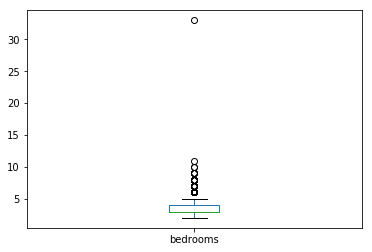

In [68]:
df['bedrooms'].plot(kind='box');

In [76]:
df['bedrooms'].value_counts()

2014-06-23    141
2014-06-26    131
2014-06-25    130
2015-04-27    126
2014-07-08    124
2015-03-25    123
2015-04-14    120
2014-07-09    119
2015-04-22    119
2014-06-24    119
2015-04-28    119
2015-04-21    117
2014-10-28    117
2014-08-26    116
2014-05-20    113
2014-08-20    113
2014-07-14    113
2015-04-08    112
2014-06-17    111
2014-07-01    111
2015-04-29    111
2014-05-28    111
2014-07-16    110
2015-04-23    110
2014-07-29    110
2015-03-27    109
2014-07-23    107
2014-08-05    107
2014-08-25    106
2014-08-11    105
             ... 
2015-02-07      3
2014-09-28      3
2014-10-05      3
2014-08-31      3
2014-08-09      2
2014-11-15      2
2014-08-24      2
2014-05-11      2
2015-02-01      2
2014-12-07      2
2014-07-04      2
2014-12-21      2
2014-12-27      2
2014-11-28      2
2015-05-10      2
2014-09-07      2
2014-05-17      1
2015-05-24      1
2015-01-31      1
2015-02-15      1
2014-08-30      1
2015-05-27      1
2014-11-02      1
2015-03-08      1
2014-07-27

In [75]:
df= df[(df['bedrooms'] >= 2) & (df['bathrooms'] <=5)]

TypeError: Cannot compare type 'Timestamp' with type 'int'

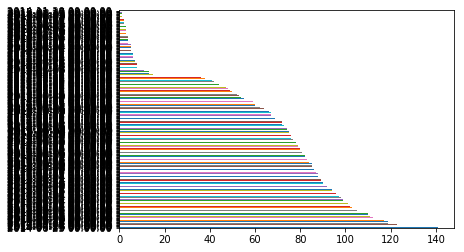

In [74]:
fig, ax = plt.subplots()
df['bedrooms'].value_counts().plot(ax=ax, kind='barh');

NameError: name 'skew' is not defined

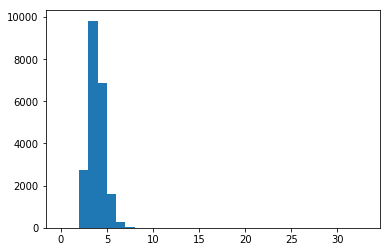

In [55]:
plt.hist(df['bedrooms'], bins=[0,1,2,3,4,5,6,7,8,9,33])
print('Skewness = ', skew(df['bedrooms']))
print('Kurtosis = ', kurtosis(df['bedrooms']))

In [72]:
df['bedrooms'].value_counts()

3     9824
4     6871
2     2760
5     1583
6      265
7       34
8       12
9        5
10       2
11       1
33       1
Name: bedrooms, dtype: int64

In [ ]:
# I need to scale later on
#df['bedrooms'] = (df['bedrooms']-np.mean(df['bedrooms']))/(max(df['bedrooms'])-min(df['bedrooms']))

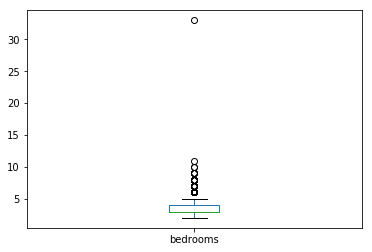

In [61]:
df['bedrooms'].plot(kind='box');

**5. bathrooms**- number of bathrooms

In [ ]:
df['bathrooms'].sample(10)

I'm not sure what a 1/4 or 3/4 bathroom is, will need to look into this further.

In [ ]:
df['bathrooms'].min()

In [ ]:
df['bathrooms'].max()

In [ ]:
df['bathrooms'].quantile([0.25,0.5,0.75])

In [ ]:
df['bathrooms'].plot(kind='box');

In [ ]:
df['bathrooms'].describe()

In [ ]:
df['bathrooms'].unique()

In [ ]:
# get z-score and assign it to variable for later use
z_bathrooms = np.abs(stats.zscore(df['bathrooms']))
print(z_bathrooms)

In [ ]:
plt.hist(df['bathrooms'], bins='auto')
print('Skewness = ', skew(df['bathrooms']))
print('Kurtosis = ', kurtosis(df['bathrooms']))

In [ ]:
sns.distplot(df['bathrooms'])

In [ ]:
# eliminate rows with outlier categorical data based upon IQR
df= df[(df['bathrooms'] <= 3.5) & (df['bathrooms'] >=0.75)]

In [ ]:
sns.boxplot(df['bathrooms']);

In [ ]:
# I need to scale later on
#df['bathrooms'] = (df['bathrooms']-np.mean(df['bathrooms']))/(max(df['bathrooms'])-min(df['bathrooms']))

df['bathrooms'].plot(kind='box');

**7. sqft_lot**

In [ ]:
df['sqft_lot'].sample(10)

In [ ]:
np.round(df['sqft_lot'].describe())

In [ ]:
df['sqft_lot'].unique()

In [ ]:
df['sqft_lot'].quantile([0.25,0.5,0.75])

In [ ]:
#wow, huge spread
np.round(df['sqft_lot'].var(),2)

1.7 Bil Sq feet is a huge variance.  I'm not even sure what that would look like.
- 1 acre = 43560 sqft
- 1,715,006492.98 sqft = 39371.13 acres
- 61.5 Square Miles

Some extremely large properties are making it impossible to use the mean. 

In [ ]:
# oh no, I may have eliminated too many rows already
df.shape

In [ ]:
df= df[(df['sqft_lot'] <= 11173) & (df['sqft_lot'] >=5000)]


In [ ]:
# just got rid of half the entries, not sure this is the correct way to go about this
df.shape

In [ ]:
# lots of outliers this will need cleaned up
np.log(df['sqft_lot']).plot(kind='box');

In [ ]:
df['sqft_lot'].quantile([0.25,0.5,0.75])

In [ ]:
# get z-score and assign it to variable for later use
z_lot = np.abs(stats.zscore(df['sqft_lot']))
print(z_lot)

In [ ]:
plt.hist(df['sqft_lot'], bins='auto')
print('Skewness = ', skew(df['sqft_lot']))
print('Kurtosis = ', kurtosis(df['sqft_lot']))

In [ ]:
sns.distplot(df['sqft_lot'])

In [ ]:
#df['sqft_lot'] = np.log(df['sqft_lot'])

In [ ]:
sns.distplot(df['sqft_lot'])

In [ ]:
#I need to do this after fixing all of the outliers
#df['sqft_lot'] = (df['sqft_lot']-np.mean(df['sqft_lot']))/(max(df['sqft_lot'])-min(df['sqft_lot']))

df['sqft_lot'].plot(kind='box');

**8. floors**

In [ ]:
df['floors'].sample(10)

In [ ]:
#what's a half, floor??
df['floors'].unique()

In [ ]:
df['floors'].mode()

In [ ]:
df['floors'].plot(kind='box')

In [ ]:
# get z-score and assign it to variable for later use
z_floors = np.abs(stats.zscore(df['floors']))
print(z_floors)

In [ ]:
plt.hist(df['floors'], bins='auto')
print('Skewness = ', skew(df['floors']))
print('Kurtosis = ', kurtosis(df['floors']))

In [ ]:
sns.distplot(df['floors'])

In [ ]:
# I need to normalize later
#df['floors'] = (df['floors']-np.mean(df['floors']))/(max(df['floors'])-min(df['floors']))

df['floors'].plot(kind='box');

**11. condition**
**detailed description of category from Kings County Website**<br>

Relative to age and grade. Coded 1-5.<br>

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.<br>

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.<br>

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.<br>

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.<br>

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility. <br>


In [ ]:
df['condition'].unique()

In [ ]:
np.round(df['condition'].describe())

In [ ]:
sns.distplot(
    df['condition']);

In [ ]:
# get z-score and assign it to variable for later use
z_condition = np.abs(stats.zscore(df['condition']))
print(z_condition)

In [ ]:
plt.hist(df['condition'], bins='auto')
print('Skewness = ', skew(df['condition']))
print('Kurtosis = ', kurtosis(df['condition']))

all of the remaining houses are in Average, Good, or Very Good Condition

**12. grade**
**detailed description of category from Kings County Website**

**GRADE** Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. (See Glossary in Area Report for Residential Building Grades in use by the King County Department of Assessments.) <br>

**From Area Report for Residential Buildings**<br>
1 = Cabin<br>
2 = Substandard<br>
3 = Poor<br>
4 = Low<br>
5 = Fair<br>
6 = Low Average<br>
7 = Average<br>
8 = Good<br>
9 = Better<br>
10 = Very Good<br>
11 = Excellent<br>
12 = Luxury<br>
13 = Mansion<br>

In [ ]:
df['grade'].describe()

In [ ]:
df['grade'].value_counts()

In [ ]:
df['grade'].plot(kind='box');

In [ ]:
# get z-score and assign it to variable for later use
z_grade = np.abs(stats.zscore(df['grade']))
print(z_grade)

**13. sqft_above**

In [ ]:
np.round(df['sqft_above'].describe(),2)

In [ ]:
df['sqft_above'].plot(kind='box');

In [ ]:
# get z-score and assign it to variable for later use
z_sqft_above = np.abs(stats.zscore(df['sqft_above']))
print(z_sqft_above)

In [ ]:
np.median(df["sqft_above"])

In [ ]:
718*3+1950


In [ ]:
df= df[(df['sqft_above'] <= 4104)]

In [ ]:
df['sqft_above'].plot(kind='box');

**14. yr_built**

In [ ]:
np.round(df['yr_built'].describe(),2)

In [ ]:
df['yr_built'].plot(kind='density',);

In [ ]:
# get z-score and assign it to variable for later use
z_yr_built = np.abs(stats.zscore(df['yr_built']))
print(z_yr_built)

In [ ]:
sns.distplot(df['yr_built'])

**16. zipcode**

In [ ]:
df['zipcode'].value_counts();

**17. lat**- latitude<br>
I'm not used to dealing with Lat and Long as a Decimal place; therefore I'm including the formula in case I need to reference it later.<br>

Formula: Decimal Degrees = (Degrees/1) + (Minutes/60) + (Seconds/3600)


In [ ]:
df['lat'].head()

**18. long** -Longitude

In [ ]:
df['long'].sample()

I can map the coordinates with the lat and long.

**20. sqft_lot15**

In [ ]:
df['sqft_lot15'].unique()

In [ ]:
np.round(df['sqft_lot15'].describe(),2)

In [ ]:
np.round(df['sqft_lot15'].var(),2)

In [ ]:
# get z-score and assign it to variable for later use
z_sqft_lot15 = np.abs(stats.zscore(df['sqft_lot15']))
print(z_sqft_lot15)